Import libraries

In [1]:
import numpy as np
import matplotlib.image as mpimg # reading images
import matplotlib.pyplot as plt
import cv2 # computer vision library

%matplotlib qt

Reading images

In [2]:
# Read image
image = mpimg.imread('waymo_car.jpg')

#print out dimension of image

print('Image Dimensions:', image.shape)

Image Dimensions: (427, 640, 3)


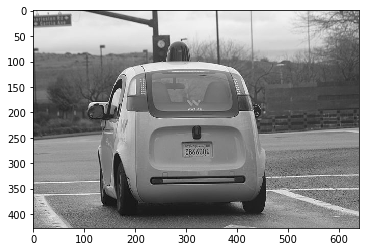

In [4]:
# convert to gray-scale

gray_img = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

plt.imshow(gray_img, cmap='gray')

In [7]:
# print specific pixel value

x = 190
y = 345
print(gray_img[y,x])

98


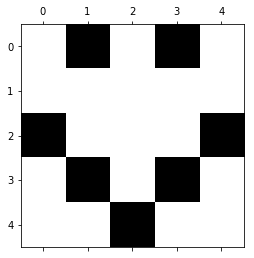

In [18]:
tiny_image = np.array([[255, 0, 255, 0, 255],
                      [255, 255, 255, 255, 255],
                      [0, 255, 255, 255, 0],
                      [255, 0, 255, 0, 255],
                      [255, 255, 0, 255, 255]])
plt.matshow(tiny_image, cmap='gray')

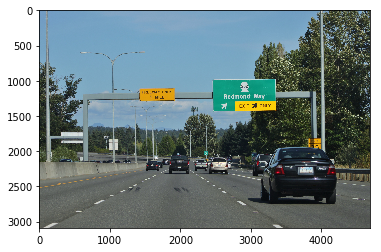

In [20]:
# Read in the image
high = mpimg.imread('wa_state_highway.jpg')

plt.imshow(high)

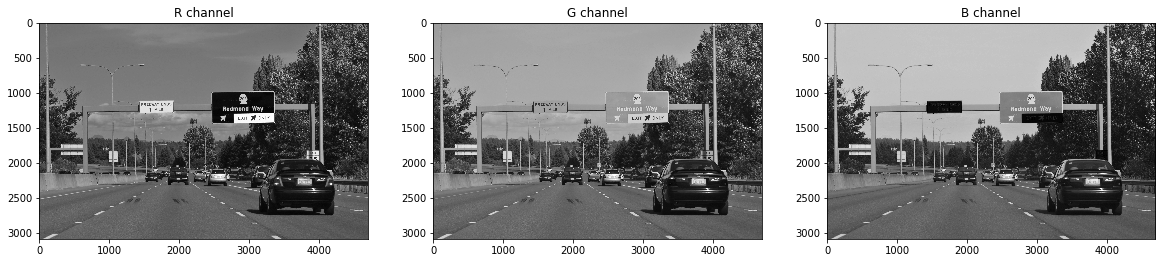

In [35]:
#isolate RGB channels
r = high[:, :, 0]
g = high[:, :, 1]
b = high[:, :, 2]

#visualize individual color channel
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R channel')
ax1.imshow(r, cmap='gray')
ax2.set_title('G channel')
ax2.imshow(g, cmap='gray')
ax3.set_title('B channel')
ax3.imshow(b, cmap='gray')

# Coding a Blue Screen ... Color Threshold

In [36]:
image = cv2.imread('pizza_bluescreen.jpg')

print('The type of image is: ',type(image))
print('The dimensions are: ',image.shape)

The type of image is:  <class 'numpy.ndarray'>
The dimensions are:  (514, 816, 3)


In [37]:
%matplotlib inline

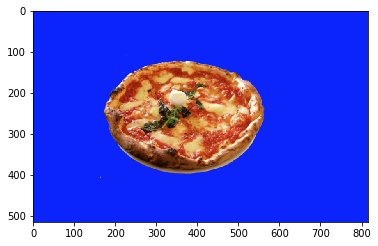

In [39]:
image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

In [46]:
# define the lower and upper bound of color threshold

lower_blue = np.array([0,0,210])
upper_blue = np.array([50,70,255])

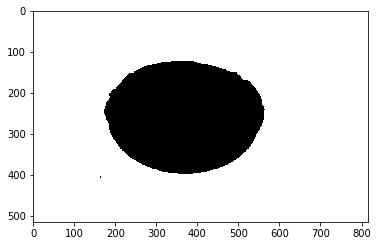

In [47]:
# Create mask
mask = cv2.inRange(image_copy,lower_blue,upper_blue)

plt.imshow(mask, cmap='gray')


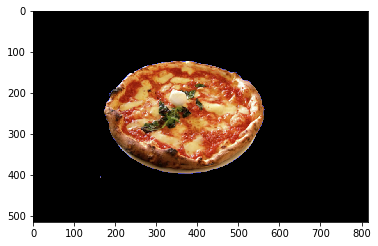

In [48]:
# mask the image to show the pizza

masked_image = np.copy(image_copy)

masked_image[mask != 0] = [0,0,0]

plt.imshow(masked_image)

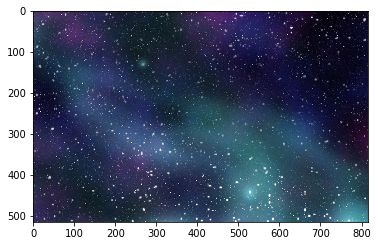

In [49]:
# Load the background image to use

background_img = cv2.imread('space_background.jpg')
background_img = cv2.cvtColor(background_img, cv2.COLOR_RGB2BGR)

# crop image to match object image
crop_background = background_img[:514,:816]

plt.imshow(crop_background)

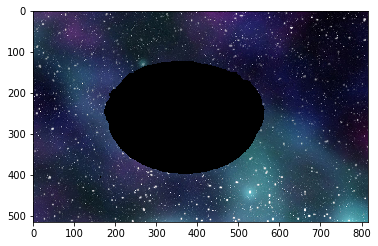

In [50]:
# apply mask again to this 

crop_background[mask == 0] = [0,0,0]

plt.imshow(crop_background)

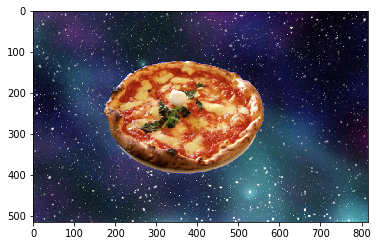

In [51]:
# now add masked_image and this background together
complete_img = crop_background + masked_image

plt.imshow(complete_img)